# benchmarks from peter koo paper

https://www.biorxiv.org/content/10.1101/2024.02.29.582810v2.full.pdf

## task 1: MPRA

In [9]:
#first thing is look at the data
import h5py
cell_name = 'lentiMPRA_HepG2.h5'
data_file = h5py.File('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/data/lenti_MPRA/'+cell_name,'r')
print(data_file.keys())
# train_seq = data_file['seq_train']
# y_train = data_file['y_train'][:]
# valid_seq = data_file['seq_valid']
# y_valid = data_file['y_valid'][:]
# test_seq = data_file['seq_test']
# y_test = np.squeeze(data_file['y_test'][:])

# print('train_seq shape:', train_seq.shape)
# print('y_train shape:', y_train.shape)
# print('valid_seq shape:', valid_seq.shape)
# print('y_valid shape:', y_valid.shape)
# print('test_seq shape:', test_seq.shape)
# print('y_test shape:', y_test.shape)
data_file['10_x'].shape

<KeysViewHDF5 ['10_x', '10_y', '10_y_avg', '1_x', '1_y', '1_y_avg', '2_x', '2_y', '2_y_avg', '3_x', '3_y', '3_y_avg', '4_x', '4_y', '4_y_avg', '5_x', '5_y', '5_y_avg', '6_x', '6_y', '6_y_avg', '7_x', '7_y', '7_y_avg', '8_x', '8_y', '8_y_avg', '9_x', '9_y', '9_y_avg']>


(24596, 230, 4)

In [ ]:
data_file['10_x'][0] #one hot encoded sequence I guess, length 230...

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0,

In [ ]:
print(data_file['10_y'].shape)
print(data_file['10_y'][0]) #this is the target score I guess?

(24596,)
0.908


In [13]:
data_file.close()

# downloaded the updated data instead!

In [14]:
cell_name = 'lentiMPRA_HepG2.h5'
data_file = h5py.File('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/data/lenti_MPRA/'+cell_name,'r')
print(data_file.keys())

<KeysViewHDF5 ['10_x', '10_y', '10_y_avg', '1_x', '1_y', '1_y_avg', '2_x', '2_y', '2_y_avg', '3_x', '3_y', '3_y_avg', '4_x', '4_y', '4_y_avg', '5_x', '5_y', '5_y_avg', '6_x', '6_y', '6_y_avg', '7_x', '7_y', '7_y_avg', '8_x', '8_y', '8_y_avg', '9_x', '9_y', '9_y_avg']>


In [15]:
data_file.close()

In [1]:
#wait it's part of the environment I guesss?
import h5py
data_file = h5py.File('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/gLM_finetune_weights/data/Processed_lentiMPRA_K562.h5')
print(data_file.keys())

<KeysViewHDF5 ['x_test', 'x_train', 'x_valid', 'y_test', 'y_train', 'y_valid']>


In [2]:
#ahh this is what we awnt!
import numpy as np
train_seq = data_file['x_train']
y_train = data_file['y_train'][:]
valid_seq = data_file['x_valid']
y_valid = data_file['y_valid'][:]
test_seq = data_file['x_test']
y_test = np.squeeze(data_file['y_test'][:])

print('train_seq shape:', train_seq.shape)
print('y_train shape:', y_train.shape)
print('valid_seq shape:', valid_seq.shape)
print('y_valid shape:', y_valid.shape)
print('test_seq shape:', test_seq.shape)
print('y_test shape:', y_test.shape)

train_seq shape: (235996, 230, 4)
y_train shape: (235996,)
valid_seq shape: (78666, 230, 4)
y_valid shape: (78666,)
test_seq shape: (78666, 230, 4)
y_test shape: (78666,)


In [ ]:
#big issue is so manyy training examples, but running model will be quite slow lmao. Maybe we can just save the output embeddings? Nah that's large
235996 * 230 * 256 /1e9
#eh actually not that massive, might be faster to precompute and save like 20 GB of data. Maybe use zarr then can easily train it!

13.89544448

In [25]:
total_num = y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]
total_num

393328

In [28]:
total_num *230*256/ 1e9 #24 GB is not that ridiculous?We can use evals to do it! Just modify it I guess...

23.15915264

In [ ]:
#wait it's times 4, almost 100 GB. Yeah let's just run it lmao! Will be slow but oh well. Shouldn't be too bad since lots of frozen weights?
#to make it more efficient, load model, manually freeze weights, then we aare pro! Let's do a manual train tbh, a little crazy but makes a ton of sense lmao! 
#that way no need for custom dataset, we can just use this and our brain!
#makes it easier to follow too
#point is don't need decoder head, and freeze weights so run with no grad? 

In [3]:
import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
# print(sys.path)
from src.models.sequence.dna_embedding import DNAEmbeddingModelCaduceus
from src.tasks.decoders import JointMaskingDecoder
from src.tasks.encoders import JointCNN
# from src.tasks.encoders import EnformerEncoder
from caduceus.configuration_caduceus import CaduceusConfig
import torch
import numpy as np
from src.dataloaders.datasets.general_dataset import GeneralDataset
import yaml
from omegaconf import OmegaConf
import os
import matplotlib.pyplot as plt
# import seaborn as sns
from tqdm import tqdm
import argparse
import itertools
import inspect
import zarr
from numcodecs import Blosc
from scipy.stats import spearmanr, pearsonr

try:
    OmegaConf.register_new_resolver('eval', eval)
    OmegaConf.register_new_resolver('div_up', lambda x, y: (x + y - 1) // y)
except ValueError as e:
    if "Resolver already registered" in str(e):
            print("Resolver already exists, skipping registration.")
    

class Evals():
    def __init__(self,
                 ckpt_path,
                 dataset=None,
                 split = 'test',
                 device = None,
                 load_data=False,
                 **dataset_overrides #Don't pass None into overrides unless you intentionally want it to be None! Pass in items only that you need
                #  data_idxs=None, #the actual value in the full self.dataset.data (so for GM12878 it's 12 or 69). Lets you access a new celltype or just subset to a smaller set of celltypes
                #  sequences_bed_file=None,
                 ) -> None:
        #TODO make it so that we can take in arbitrary dataset information in like a dict and adds options to dataset
        
        #now load the cfg from the checkpoint path
        model_cfg_path = os.path.join(os.path.dirname(os.path.dirname(ckpt_path)), '.hydra', 'config.yaml')
        cfg = yaml.load(open(model_cfg_path, 'r'), Loader=yaml.FullLoader)
        cfg = OmegaConf.create(cfg)
        self.cfg = OmegaConf.to_container(cfg, resolve=True)
        
        if self.cfg['train'].get('custom_metric', None) == 'ce_loss_mask_acc': #makes sure we never do softplus in the loss if it's a categorical model!
            self.skip_softplus=True
        else:
            self.skip_softplus=False
        
        state_dict = torch.load(ckpt_path, map_location='cpu')
        if device is not None:
            #if we are given a device, we will use that device
            self.device = torch.device(device)
        else:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.split = split

        #now set up dataset
        if dataset is None:
            dataset_args = self.cfg['dataset']
            sig = inspect.signature(GeneralDataset.__init__)
            sig = {k: v for k, v in sig.parameters.items() if k != 'self'}
            to_remove = []
            for k, v in dataset_args.items():
                if k not in sig:
                    # del dataset_args[k]
                    to_remove.append(k)
            for k in to_remove:
                del dataset_args[k]
            dataset_args['split'] = split
            dataset_args['evaluating'] = True #this tells it to not do things like random shifting and rc aug, still does random masking tho, can get og sequence easily
            dataset_args['load_in'] = load_data
            
            for k, v in dataset_overrides.items():
                if k in sig:
                    dataset_args[k] = v
                    print(f"Overriding {k} with {v}")
                else:
                    print(f"Warning: {k} not in dataset args, skipping")
            
            # if data_idxs is not None:
            #     dataset_args['data_idxs'] = data_idxs
            # if sequences_bed_file is not None:
            #     dataset_args['sequences_bed_file'] = sequences_bed_file
            # dataset_args['rc_aug'] = False #we don't want to do rc aug in our evaluation class!!!
            self.dataset_args = dataset_args
            # self.dataset_args['rc_aug'] = False #we don't want to do rc aug in our evaluation class!!!
            self.dataset = GeneralDataset(**dataset_args)
            
            # self.kmer_len = dataset_args['kmer_len']
            # self.dataset = enformer_dataset.EnformerDataset(split, dataset_args['max_length'], rc_aug = dataset_args['rc_aug'],
            #                                                 return_CAGE=dataset_args['return_CAGE'], cell_type=dataset_args.get('cell_type', None),
            #                                                 kmer_len=dataset_args['kmer_len']) #could use dataloader instead, but again kinda complex
        else:
            self.dataset = dataset
         
        torch.nn.modules.utils.consume_prefix_in_state_dict_if_present(
            state_dict["state_dict"], "model."
        )
        model_state_dict = state_dict["state_dict"]
        # need to remove torchmetrics. to remove keys, need to convert to list first
        for key in list(model_state_dict.keys()):
            if "torchmetrics" in key:
                model_state_dict.pop(key)
        # the state_dict keys slightly mismatch from Lightning..., so we fix it here
        decoder_state_dict = {}
        for key in list(model_state_dict.keys()):
            if "decoder" in key:
                decoder_state_dict[key[10:]] = model_state_dict.pop(key)
        encoder_state_dict = {}
        for key in list(model_state_dict.keys()):
            if "encoder" in key:
                encoder_state_dict[key[10:]] = model_state_dict.pop(key)
        
        cfg['model']['config'].pop('_target_')
        # cfg['model']['config']['complement_map'] = self.dataset.tokenizer.complement_map
        caduceus_cfg = CaduceusConfig(**cfg['model']['config'])
        
        self.backbone = DNAEmbeddingModelCaduceus(config=caduceus_cfg)
        self.backbone.load_state_dict(model_state_dict, strict=True)
        
        #remove self.cfg['decoder']['_name_']
        del self.cfg['decoder']['_name_']
        self.cfg['decoder']['d_model'] = self.cfg['model']['config']['d_model']
        self.decoder = JointMaskingDecoder(**self.cfg['decoder']) #could do with instantiating, but that is rather complex
        self.decoder.load_state_dict(decoder_state_dict, strict=True)
        
        del self.cfg['encoder']['_name_']
        self.cfg['encoder']['d_model'] = self.cfg['model']['config']['d_model']
        self.encoder = JointCNN(**self.cfg['encoder'])
        self.encoder.load_state_dict(encoder_state_dict, strict=True)
        
        self.encoder.to(self.device).eval()
        self.backbone.to(self.device).eval()
        self.decoder.to(self.device).eval()
        
    def __call__(self, idx=None, data=None, softplus=True, og=False, embed=False):
        #now evaluate the model on one example
        if data is None:
            (seq,acc),(seq_unmask,acc_unmask) = self.dataset[idx]
            
            x = seq.unsqueeze(0)
            y = acc.unsqueeze(0)
        else:
            x,y,seq_unmask,acc_unmask = data

            if x.dim() == 2:
                x = x.unsqueeze(0) #add batch dim
                y = y.unsqueeze(0) #add batch dim
        
        x,y = x.to(self.device), y.to(self.device)
        
        with torch.no_grad():
            x1 = self.encoder(x,y)
            x1,_ = self.backbone(x1)
            if embed:
                return x1, y
            x1 = self.decoder(x1)
            seq,acc = x1

            if softplus and not self.skip_softplus:
                acc = torch.nn.functional.softplus(x1[1])
        
        return seq, acc, seq_unmask, acc_unmask
    
    def freeze(self):
        '''freezes the model, so that it doesn't update the weights during training'''
        for param in self.backbone.parameters():
            param.requires_grad = False
        for param in self.encoder.parameters():
            param.requires_grad = False
        for param in self.decoder.parameters():
            param.requires_grad = False

ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-04-11/13-44-58-301569/checkpoints/last.ckpt'
evals = Evals(ckpt_path, device=2)

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous


In [4]:
out = evals.dataset[0]
out[0][0].shape, out[0][1].shape

(torch.Size([6, 524288]), torch.Size([2, 524288]))

In [5]:
train_seq[0:1].shape

(1, 230, 4)

In [8]:
train_seq[0:1].transpose(0,2,1).shape

(1, 4, 230)

In [32]:
N = 524288
k = 230

start = (N - k) // 2
end   = start + k

full_seq = torch.zeros((1, 6, 524288), dtype=torch.float32)
full_seq[:, 4, :] = 1 #by default set all to N
full_seq[:, :4, start:end] = torch.tensor(train_seq[0:1].transpose(0,2,1))
full_seq[:, 4, start:end] = 0 #Get rid of the N

In [33]:
full_seq[:,:,start:end]

tensor([[[1., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 1., 1.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [34]:
full_seq[:,:,start:end].sum(2) #no N or mask

tensor([[58., 63., 53., 56.,  0.,  0.]])

In [35]:
full_seq.sum(2) #matches what we expect!!

tensor([[5.8000e+01, 6.3000e+01, 5.3000e+01, 5.6000e+01, 5.2406e+05, 0.0000e+00]])

In [36]:
full_acc = torch.zeros((1, 2, 524288), dtype=torch.float32)
full_acc[:, 1, :] = 1 #by default set all to mask token

In [37]:
#now let's input into the model
full_input = (full_seq, full_acc, None, None)
out = evals(data=full_input, embed=True)

In [38]:
out[0].shape

torch.Size([1, 524288, 256])

In [39]:
out[1].shape

torch.Size([1, 2, 524288])

In [40]:
embed = out[0][0,start:end,:].cpu().numpy()
embed.shape #now is length x channels!

(230, 256)

In [41]:
embed

array([[ 8.94552250e-06,  3.78216684e-01,  1.17337452e-02, ...,
         8.05438403e-03, -1.13417991e-02,  3.94007657e-04],
       [ 1.13959195e-05,  5.23900092e-01,  1.45173753e-02, ...,
        -1.90984868e-02, -9.93972272e-03,  3.65368789e-04],
       [ 1.39155409e-05,  5.62545359e-01,  8.43012631e-02, ...,
        -2.65018512e-02, -1.18921709e-03,  6.26180627e-05],
       ...,
       [ 5.74245360e-06,  2.23858878e-01,  3.35820280e-02, ...,
        -5.68763576e-02,  3.73024009e-02,  5.14930754e-04],
       [ 4.53502480e-06,  4.76841748e-01,  7.62563422e-02, ...,
        -8.62073004e-02,  8.48264154e-03,  7.70364131e-04],
       [ 1.13357942e-06,  4.63630676e-01,  5.27800061e-02, ...,
        -8.29901919e-02,  1.32001210e-02,  7.98963709e-04]], dtype=float32)

In [42]:
embed_og = embed

In [24]:
#can we input different size inputs
full_seq = torch.zeros((1, 6, 500000), dtype=torch.float32)
full_seq[:, 4, :] = 1 #by default set all to N
full_seq[:, :4, start:end] = torch.tensor(train_seq[0:1].transpose(0,2,1))
full_seq[:, 4, start:end] = 0 #Get rid of the N

full_acc = torch.zeros((1, 2, 500000), dtype=torch.float32)
full_acc[:, 1, :] = 1 #by default set all to mask token

full_input = (full_seq, full_acc, None, None)
out = evals(data=full_input, embed=True)

In [43]:
#oh we can jsut input different lengths into my model. This is because mamba models are position invariant. It actually doesn't really matter. We could manmually right pad according to tri dao. 
full_seq = torch.zeros((1, 6, 230), dtype=torch.float32)
full_seq[:, :4, :] = torch.tensor(train_seq[0:1].transpose(0,2,1)) #no need to set to N
full_seq

tensor([[[1., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 1., 1.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [44]:
full_acc = torch.zeros((1, 2, 230), dtype=torch.float32)
full_acc[:, 1, :] = 1 #by default set all to mask token

In [45]:
#now input
full_input = (full_seq, full_acc, None, None)
out = evals(data=full_input, embed=True)

In [46]:
out[0].shape #if for some reason it doesn't work, then we can 

torch.Size([1, 230, 256])

In [49]:
out[0].shape

torch.Size([1, 230, 256])

In [50]:
embed.shape

(230, 256)

In [51]:
out[0][0]

tensor([[ 6.9250e-07, -1.6966e-01,  3.0803e-02,  ..., -1.6349e-02,
          4.3387e-02,  3.2061e-04],
        [ 2.5400e-06, -4.6585e-02,  5.8906e-02,  ...,  2.8285e-03,
          4.7474e-02, -1.9876e-04],
        [-1.8378e-06,  1.0134e-01,  6.2239e-02,  ..., -3.8568e-02,
          4.1896e-02, -4.3522e-05],
        ...,
        [ 3.3813e-08, -2.3887e-01, -2.2688e-02,  ...,  6.7533e-02,
          3.6544e-02,  1.0796e-04],
        [ 2.1639e-06,  2.6132e-02,  2.0470e-02,  ...,  4.1174e-02,
          3.2038e-03,  5.3097e-04],
        [ 6.3550e-06,  1.2932e-01,  4.7991e-02,  ..., -3.4293e-02,
          1.6990e-02, -5.0037e-04]], device='cuda:2')

In [52]:
embed

array([[ 8.94552250e-06,  3.78216684e-01,  1.17337452e-02, ...,
         8.05438403e-03, -1.13417991e-02,  3.94007657e-04],
       [ 1.13959195e-05,  5.23900092e-01,  1.45173753e-02, ...,
        -1.90984868e-02, -9.93972272e-03,  3.65368789e-04],
       [ 1.39155409e-05,  5.62545359e-01,  8.43012631e-02, ...,
        -2.65018512e-02, -1.18921709e-03,  6.26180627e-05],
       ...,
       [ 5.74245360e-06,  2.23858878e-01,  3.35820280e-02, ...,
        -5.68763576e-02,  3.73024009e-02,  5.14930754e-04],
       [ 4.53502480e-06,  4.76841748e-01,  7.62563422e-02, ...,
        -8.62073004e-02,  8.48264154e-03,  7.70364131e-04],
       [ 1.13357942e-06,  4.63630676e-01,  5.27800061e-02, ...,
        -8.29901919e-02,  1.32001210e-02,  7.98963709e-04]], dtype=float32)

In [ ]:
#of course it won't be perfectly identical as one is padded by N, the other is whatever. So let's just try the 230 for now! A bit of a weirder case, but oh well...
#actually it probably does its own padding type thing? Let's manually pad, that's smarter!!

In [55]:
N = 524288
k = 230

start = (N - k) // 2
end   = start + k

full_seq = torch.zeros((1, 6, 524288), dtype=torch.float32)
full_seq[:, 4, :] = 1 #by default set all to N
full_seq[:, :4, start:end] = torch.tensor(train_seq[0:1].transpose(0,2,1))
full_seq[:, 4, start:end] = 0 #Get rid of the N

full_acc = torch.zeros((1, 2, 524288), dtype=torch.float32)
full_acc[:, 1, :] = 1 #by default set all to mask token

#now let's input into the model
full_input = (full_seq, full_acc, None, None)
out = evals(data=full_input, embed=True)
embed = out[0][0,start:end,:].cpu().numpy()
embed.shape #now is length x channels!

(230, 256)

In [56]:
N = 524288
k = 230

start = (N - k) // 2
end   = start + k

full_seq = torch.zeros((1, 6, 524288), dtype=torch.float32)
full_seq[:, 4, :] = 1 #by default set all to N
full_seq[:, :4, start:end] = torch.tensor(train_seq[0:1].transpose(0,2,1))
full_seq[:, 4, start:end] = 0 #Get rid of the N

full_acc = torch.zeros((1, 2, 524288), dtype=torch.float32)
full_acc[:, 1, :] = 1 #by default set all to mask token

#now let's input into the model
full_input = (full_seq, full_acc, None, None)
out = evals(data=full_input, embed=True)

In [ ]:
#it's the transfer to cpu that seems to be slow?
embed = out[0][0,start:end,:].cpu().numpy() #wait this time it was instant?

In [ ]:
embed.shape #yeah I have no clue sometimes slow other times fast?? Oh it's because gpu is asyync so out runs in the background.

(230, 256)

# rest of the training loop

Define the CNN and figure out how to set up the training exactly like they do!!

We will actually do Ridge regression and we can then save out the mean embedding for all the samples

In [ ]:
393328*256/1e9 #not bad at all, perfectlyy fine

0.100691968

In [1]:
#wait it's part of the environment I guesss?
import h5py
data_file = h5py.File('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/gLM_finetune_weights/data/Processed_lentiMPRA_K562.h5')
print(data_file.keys())
#ahh this is what we awnt!
import numpy as np
train_seq = data_file['x_train']
y_train = data_file['y_train'][:]
valid_seq = data_file['x_valid']
y_valid = data_file['y_valid'][:]
test_seq = data_file['x_test']
y_test = np.squeeze(data_file['y_test'][:])

print('train_seq shape:', train_seq.shape)
print('y_train shape:', y_train.shape)
print('valid_seq shape:', valid_seq.shape)
print('y_valid shape:', y_valid.shape)
print('test_seq shape:', test_seq.shape)
print('y_test shape:', y_test.shape)

<KeysViewHDF5 ['x_test', 'x_train', 'x_valid', 'y_test', 'y_train', 'y_valid']>
train_seq shape: (235996, 230, 4)
y_train shape: (235996,)
valid_seq shape: (78666, 230, 4)
y_valid shape: (78666,)
test_seq shape: (78666, 230, 4)
y_test shape: (78666,)


In [2]:
import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/')
# print(sys.path)
from src.models.sequence.dna_embedding import DNAEmbeddingModelCaduceus
from src.tasks.decoders import JointMaskingDecoder
from src.tasks.encoders import JointCNN
# from src.tasks.encoders import EnformerEncoder
from caduceus.configuration_caduceus import CaduceusConfig
import torch
import numpy as np
from src.dataloaders.datasets.general_dataset import GeneralDataset
import yaml
from omegaconf import OmegaConf
import os
import matplotlib.pyplot as plt
# import seaborn as sns
from tqdm import tqdm
import argparse
import itertools
import inspect
import zarr
from numcodecs import Blosc
from scipy.stats import spearmanr, pearsonr

try:
    OmegaConf.register_new_resolver('eval', eval)
    OmegaConf.register_new_resolver('div_up', lambda x, y: (x + y - 1) // y)
except ValueError as e:
    if "Resolver already registered" in str(e):
            print("Resolver already exists, skipping registration.")
    

class Evals():
    def __init__(self,
                 ckpt_path,
                 dataset=None,
                 split = 'test',
                 device = None,
                 load_data=False,
                 **dataset_overrides #Don't pass None into overrides unless you intentionally want it to be None! Pass in items only that you need
                #  data_idxs=None, #the actual value in the full self.dataset.data (so for GM12878 it's 12 or 69). Lets you access a new celltype or just subset to a smaller set of celltypes
                #  sequences_bed_file=None,
                 ) -> None:
        #TODO make it so that we can take in arbitrary dataset information in like a dict and adds options to dataset
        
        #now load the cfg from the checkpoint path
        model_cfg_path = os.path.join(os.path.dirname(os.path.dirname(ckpt_path)), '.hydra', 'config.yaml')
        cfg = yaml.load(open(model_cfg_path, 'r'), Loader=yaml.FullLoader)
        cfg = OmegaConf.create(cfg)
        self.cfg = OmegaConf.to_container(cfg, resolve=True)
        
        if self.cfg['train'].get('custom_metric', None) == 'ce_loss_mask_acc': #makes sure we never do softplus in the loss if it's a categorical model!
            self.skip_softplus=True
        else:
            self.skip_softplus=False
        
        state_dict = torch.load(ckpt_path, map_location='cpu')
        if device is not None:
            #if we are given a device, we will use that device
            self.device = torch.device(device)
        else:
            self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.split = split

        #now set up dataset
        if dataset is None:
            dataset_args = self.cfg['dataset']
            sig = inspect.signature(GeneralDataset.__init__)
            sig = {k: v for k, v in sig.parameters.items() if k != 'self'}
            to_remove = []
            for k, v in dataset_args.items():
                if k not in sig:
                    # del dataset_args[k]
                    to_remove.append(k)
            for k in to_remove:
                del dataset_args[k]
            dataset_args['split'] = split
            dataset_args['evaluating'] = True #this tells it to not do things like random shifting and rc aug, still does random masking tho, can get og sequence easily
            dataset_args['load_in'] = load_data
            
            for k, v in dataset_overrides.items():
                if k in sig:
                    dataset_args[k] = v
                    print(f"Overriding {k} with {v}")
                else:
                    print(f"Warning: {k} not in dataset args, skipping")
            
            # if data_idxs is not None:
            #     dataset_args['data_idxs'] = data_idxs
            # if sequences_bed_file is not None:
            #     dataset_args['sequences_bed_file'] = sequences_bed_file
            # dataset_args['rc_aug'] = False #we don't want to do rc aug in our evaluation class!!!
            self.dataset_args = dataset_args
            # self.dataset_args['rc_aug'] = False #we don't want to do rc aug in our evaluation class!!!
            self.dataset = GeneralDataset(**dataset_args)
            
            # self.kmer_len = dataset_args['kmer_len']
            # self.dataset = enformer_dataset.EnformerDataset(split, dataset_args['max_length'], rc_aug = dataset_args['rc_aug'],
            #                                                 return_CAGE=dataset_args['return_CAGE'], cell_type=dataset_args.get('cell_type', None),
            #                                                 kmer_len=dataset_args['kmer_len']) #could use dataloader instead, but again kinda complex
        else:
            self.dataset = dataset
         
        torch.nn.modules.utils.consume_prefix_in_state_dict_if_present(
            state_dict["state_dict"], "model."
        )
        model_state_dict = state_dict["state_dict"]
        # need to remove torchmetrics. to remove keys, need to convert to list first
        for key in list(model_state_dict.keys()):
            if "torchmetrics" in key:
                model_state_dict.pop(key)
        # the state_dict keys slightly mismatch from Lightning..., so we fix it here
        decoder_state_dict = {}
        for key in list(model_state_dict.keys()):
            if "decoder" in key:
                decoder_state_dict[key[10:]] = model_state_dict.pop(key)
        encoder_state_dict = {}
        for key in list(model_state_dict.keys()):
            if "encoder" in key:
                encoder_state_dict[key[10:]] = model_state_dict.pop(key)
        
        cfg['model']['config'].pop('_target_')
        # cfg['model']['config']['complement_map'] = self.dataset.tokenizer.complement_map
        caduceus_cfg = CaduceusConfig(**cfg['model']['config'])
        
        self.backbone = DNAEmbeddingModelCaduceus(config=caduceus_cfg)
        self.backbone.load_state_dict(model_state_dict, strict=True)
        
        #remove self.cfg['decoder']['_name_']
        del self.cfg['decoder']['_name_']
        self.cfg['decoder']['d_model'] = self.cfg['model']['config']['d_model']
        self.decoder = JointMaskingDecoder(**self.cfg['decoder']) #could do with instantiating, but that is rather complex
        self.decoder.load_state_dict(decoder_state_dict, strict=True)
        
        del self.cfg['encoder']['_name_']
        self.cfg['encoder']['d_model'] = self.cfg['model']['config']['d_model']
        self.encoder = JointCNN(**self.cfg['encoder'])
        self.encoder.load_state_dict(encoder_state_dict, strict=True)
        
        self.encoder.to(self.device).eval()
        self.backbone.to(self.device).eval()
        self.decoder.to(self.device).eval()
        
    def __call__(self, idx=None, data=None, softplus=True, og=False, embed=False):
        #now evaluate the model on one example
        if data is None:
            (seq,acc),(seq_unmask,acc_unmask) = self.dataset[idx]
            
            x = seq.unsqueeze(0)
            y = acc.unsqueeze(0)
        else:
            x,y,seq_unmask,acc_unmask = data

            if x.dim() == 2:
                x = x.unsqueeze(0) #add batch dim
                y = y.unsqueeze(0) #add batch dim
        
        x,y = x.to(self.device), y.to(self.device)
        
        with torch.no_grad():
            x1 = self.encoder(x,y)
            x1,_ = self.backbone(x1)
            if embed:
                return x1, y
            x1 = self.decoder(x1)
            seq,acc = x1

            if softplus and not self.skip_softplus:
                acc = torch.nn.functional.softplus(x1[1])
        
        return seq, acc, seq_unmask, acc_unmask
    
    def freeze(self):
        '''freezes the model, so that it doesn't update the weights during training'''
        for param in self.backbone.parameters():
            param.requires_grad = False
        for param in self.encoder.parameters():
            param.requires_grad = False
        for param in self.decoder.parameters():
            param.requires_grad = False

ckpt_path = '/data1/lesliec/sarthak/caduceus/outputs/2025-04-11/13-44-58-301569/checkpoints/last.ckpt'
evals = Evals(ckpt_path, device=0)

JointMaskingDecoder: d_model=256, d_output1=5, d_output2=1
JointMaskingEncoder: d_model=256, d_input1=6, d_input2=2, joint=False, kernel_size=15, combine=True, acc_type=continuous


In [3]:
N = 524288
k = 230

start = (N - k) // 2
end   = start + k



In [5]:
full_seq = torch.zeros((1, 6, 524288), dtype=torch.float32)
full_seq[:, 4, :] = 1 #by default set all to N
full_seq[:, :4, start:end] = torch.tensor(train_seq[0:1].transpose(0,2,1))
full_seq[:, 4, start:end] = 0 #Get rid of the N

full_acc = torch.zeros((1, 2, 524288), dtype=torch.float32)
full_acc[:, 1, :] = 1 #by default set all to mask token and input no accessibility

#now let's input into the model
full_input = (full_seq, full_acc, None, None)
out = evals(data=full_input, embed=True)
embed = out[0][0,start:end,:].cpu().numpy()
embed.shape #now is length x channels!

(230, 256)

In [ ]:
#and let's do for batch size of 4
full_seq = torch.zeros((4, 6, 524288), dtype=torch.float32)
full_seq[:, 4, :] = 1 #by default set all to N
full_seq[:, :4, start:end] = torch.tensor(train_seq[0:4].transpose(0,2,1)) #assign seq
full_seq[:, 4, start:end] = 0 #Get rid of the N

full_acc = torch.zeros((4, 2, 524288), dtype=torch.float32)
full_acc[:, 1, :] = 1 #by default set all to mask token and input no accessibility

#now let's input into the model
full_input = (full_seq, full_acc, None, None)
out = evals(data=full_input, embed=True)
embed = out[0][:,start:end,:].cpu().numpy()
embed.shape #now is length x channels!

(4, 230, 256)

In [9]:
#total elements
total_num = y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]
total_num

393328

In [10]:
full_output = np.zeros((total_num,256), dtype=np.float32)
full_output.shape

(393328, 256)

In [ ]:
full_output.nbytes/1e9 #yeah it's negligible

0.402767872

In [ ]:
list(range(0,10,3)) #includes elements that might spillover which is fine

[0, 3, 6, 9]

In [16]:
#now loop over batches
batch_size = 4
for i in tqdm(range(0, total_num, batch_size)):
    #get the batch
    if i + batch_size > total_num:
        batch_size = total_num - i
    
    full_seq = torch.zeros((batch_size, 6, 524288), dtype=torch.float32)
    full_seq[:, 4, :] = 1 #by default set all to N
    full_seq[:, :4, start:end] = torch.tensor(train_seq[i:i+batch_size].transpose(0,2,1)) #assign seq
    full_seq[:, 4, start:end] = 0 #Get rid of the N

    full_acc = torch.zeros((batch_size, 2, 524288), dtype=torch.float32)
    full_acc[:, 1, :] = 1 #by default set all to mask token and input no accessibility

    #now let's input into the model
    full_input = (full_seq, full_acc, None, None)
    out = evals(data=full_input, embed=True)
    embed = out[0][:,start:end,:].sum(1).cpu().numpy()
    
    #save the output
    full_output[i:i+batch_size] = embed

  0%|          | 14/98332 [00:59<115:32:30,  4.23s/it]


KeyboardInterrupt: 

In [17]:
train_seq.shape

(235996, 230, 4)

In [ ]:
full_output = torch.zeros((total_num,256), dtype=torch.float32).to(evals.device)
print(full_output.shape)
full_seqs = torch.zeros((total_num, 230, 4), dtype=torch.float32)
full_seqs[:train_seq.shape[0],:,:] = torch.tensor(train_seq)
full_seqs[train_seq.shape[0]:train_seq.shape[0]+valid_seq.shape[0],:,:] = torch.tensor(valid_seq)
full_seqs[train_seq.shape[0]+valid_seq.shape[0]:,:] = torch.tensor(test_seq)
full_seqs = full_seqs.transpose(2,1)
print(full_seqs.shape)

torch.Size([393328, 256])


In [5]:
#that's quire slow for some reason
total_num = y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]
full_output = torch.zeros((total_num,256), dtype=torch.float32).to(evals.device)
print(full_output.shape)
full_seqs = np.zeros((total_num, 230, 4), dtype=np.float32)
full_seqs[:train_seq.shape[0],:,:] = train_seq
full_seqs[train_seq.shape[0]:train_seq.shape[0]+valid_seq.shape[0],:,:] = valid_seq
full_seqs[train_seq.shape[0]+valid_seq.shape[0]:,:] = test_seq
full_seqs = full_seqs.transpose(0,2,1)
print(full_seqs.shape)

torch.Size([393328, 256])
(393328, 4, 230)


In [6]:
#now transfer to GPU
full_seqs = torch.tensor(full_seqs).to(evals.device)
print(full_seqs.shape)

torch.Size([393328, 4, 230])


In [8]:
#this will not only take forever, but it will also not work since trian seq doesn't go that far lol

#let's minimize transfers to cpu

batch_size = 4
for i in tqdm(range(0, total_num, batch_size)):
    #get the batch
    if i + batch_size > total_num:
        batch_size = total_num - i
    
    full_seq = torch.zeros((batch_size, 6, 524288), dtype=torch.float32)
    full_seq[:, 4, :] = 1 #by default set all to N
    full_seq[:, :4, start:end] = full_seqs[i:i+batch_size] #assign seq
    full_seq[:, 4, start:end] = 0 #Get rid of the N

    full_acc = torch.zeros((batch_size, 2, 524288), dtype=torch.float32)
    full_acc[:, 1, :] = 1 #by default set all to mask token and input no accessibility

    #now let's input into the model
    full_input = (full_seq, full_acc, None, None)
    out = evals(data=full_input, embed=True)
    embed = out[0][:,start:end,:].sum(1)
    
    #save the output
    full_output[i:i+batch_size] = embed

  0%|          | 17/98332 [01:07<108:05:32,  3.96s/it]


KeyboardInterrupt: 

In [9]:
#it's faster for sure, but still quite slow
batch_size = 8
for i in tqdm(range(0, total_num, batch_size)):
    #get the batch
    if i + batch_size > total_num:
        batch_size = total_num - i
    
    full_seq = torch.zeros((batch_size, 6, 524288), dtype=torch.float32)
    full_seq[:, 4, :] = 1 #by default set all to N
    full_seq[:, :4, start:end] = full_seqs[i:i+batch_size] #assign seq
    full_seq[:, 4, start:end] = 0 #Get rid of the N

    full_acc = torch.zeros((batch_size, 2, 524288), dtype=torch.float32)
    full_acc[:, 1, :] = 1 #by default set all to mask token and input no accessibility

    #now let's input into the model
    full_input = (full_seq, full_acc, None, None)
    out = evals(data=full_input, embed=True)
    embed = out[0][:,start:end,:].sum(1)
    
    #save the output
    full_output[i:i+batch_size] = embed

  0%|          | 0/49166 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 8.00 GiB. GPU 0 has a total capacty of 79.11 GiB of which 6.27 GiB is free. Including non-PyTorch memory, this process has 72.83 GiB memory in use. Of the allocated memory 69.17 GiB is allocated by PyTorch, and 2.63 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
#yeah can't do 8, can only do 4 and I guess we let it run for a bit? Idk why it's so slow dude...
#just save it to script and let ir run for a while I guess. We'll use mean embedding for everything...

# save it to a zarr so we can write to it in parallel

In [11]:
import zarr

#make an array
total_num=393328
zarr_path = "/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/embeddings_lentiMPRA_K562.zarr"
zarr_open = zarr.open(zarr_path, mode='w', shape=(total_num, 230, 256), chunks=(4, 230, 256), dtype='float32', zarr_format=2)

In [9]:
zarr_open.nbytes/1e9

92.63661056

# now let's look at it

In [1]:
#saved it let's open it
import zarr
zarr_path = "/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/embeddings_lentiMPRA_K562.zarr"
zarr_open = zarr.open(zarr_path, mode='r')
zarr_open.shape

(393328, 230, 256)

In [2]:
zarr_open.nbytes/1e9

92.63661056

In [6]:
import numpy as np
from tqdm import tqdm
total_num = zarr_open.shape[0]
avg_embedding = np.zeros((total_num, 230), dtype=np.float32)
for i in tqdm(range(total_num)):
    avg_embedding[i] = zarr_open[i].mean(1)

  0%|          | 0/393328 [00:00<?, ?it/s]

100%|██████████| 393328/393328 [11:00<00:00, 595.24it/s]


In [7]:
3

3

In [ ]:
avg_embedding.shape
#lmao we did the wrong mean!

(393328, 230)

In [2]:
#let's redo it
import numpy as np
from tqdm import tqdm
total_num = zarr_open.shape[0]
avg_embedding = np.zeros((total_num, 256), dtype=np.float32)

chunk_size = 4

for start in tqdm(range(0, total_num, chunk_size)):
    end = min(start + chunk_size, total_num)
    avg_embedding[start:end] = zarr_open[start:end].mean(1)

100%|██████████| 98332/98332 [04:28<00:00, 366.82it/s]


In [3]:
#now we can test it
import h5py
data_file = h5py.File('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/gLM_finetune_weights/data/Processed_lentiMPRA_K562.h5')
print(data_file.keys())
#ahh this is what we awnt!
import numpy as np
train_seq = data_file['x_train']
y_train = data_file['y_train'][:]
valid_seq = data_file['x_valid']
y_valid = data_file['y_valid'][:]
test_seq = data_file['x_test']
y_test = np.squeeze(data_file['y_test'][:])

train_size = train_seq.shape[0]
valid_size = valid_seq.shape[0]
test_size = test_seq.shape[0]
# mean_embed = avg_embedding[:train_size+valid_size+test_size]
print(y_test.shape)


# cls_model = LinearRegression().fit(cls_embed[:train_size], y_train)
# lr_cls.append(scipy.stats.pearsonr(np.squeeze(cls_model.predict(cls_embed[train_size+valid_size:])), y_test)[0])
# embed_model = LinearRegression().fit(mean_embed[:train_size],y_train)
# lr_embed.append(scipy.stats.pearsonr(np.squeeze(embed_model.predict(mean_embed[train_size+valid_size:])),y_test)[0])

<KeysViewHDF5 ['x_test', 'x_train', 'x_valid', 'y_test', 'y_train', 'y_valid']>
(78666,)


In [ ]:
# mean_embed = zarr_open[:].mean(axis=1)
# mean_embed.shape

In [4]:
from sklearn.linear_model import Ridge
import scipy.stats
mean_embed = avg_embedding[:train_size+valid_size+test_size]
embed_model = Ridge(0.001).fit(mean_embed[:train_size],y_train)
out = scipy.stats.pearsonr(np.squeeze(embed_model.predict(mean_embed[train_size+valid_size:])),y_test)[0]



/data1/lesliec/sarthak/caduceus/.pixi/envs/default/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.26482e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [6]:
mean_embed[train_size+valid_size:].shape

(78666, 256)

In [7]:
y_test.shape

(78666,)

In [8]:
embed_model.predict(mean_embed[train_size+valid_size:]).shape

(78666,)

In [5]:
print(out)

0.5149897410210402


In [ ]:
#let's plot it via bar plot
import matplotlib.pyplot as plt
import pandas as pd
other_results = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/LLM_regression.csv')
other_results = other_results[other_results['Model'] == 'Mean-embed-Ridge']
other_results = other_results[other_results['Cell Type'] == 'K562']
other_results

,LLM,Model,Performance,Cell Type
1,hyena,Mean-embed-Ridge,0.379827,K562
3,gpn,Mean-embed-Ridge,0.453951,K562
6,dnabert,Mean-embed-Ridge,0.422725,K562
10,randbert,Mean-embed-Ridge,0.345997,K562


In [6]:
#let's add a row at the bottom of the df
out = 0.5149897410210402
new_row = pd.DataFrame({'Model': ['Mean-embed-Ridge'], 'Cell Type': ['K562'], 'Performance': [out], 'LLM': ['joint']})
other_results = pd.concat([other_results, new_row], ignore_index=True)
other_results

,LLM,Model,Performance,Cell Type
0,hyena,Mean-embed-Ridge,0.379827,K562
1,gpn,Mean-embed-Ridge,0.453951,K562
2,dnabert,Mean-embed-Ridge,0.422725,K562
3,randbert,Mean-embed-Ridge,0.345997,K562
4,joint,Mean-embed-Ridge,0.514990,K562


In [ ]:
#will do bar plot after MLP

In [ ]:
#our value is definitely higher! like substantially higher!
#seems that even without accessibility input, this learns a lot more about even general sequence features!!

In [9]:
#let's see if the other data file is similar
data_file.close()
data_file = h5py.File('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/gLM_finetune_weights/data/Processed_lentiMPRA_HepG2.h5')
x_train2 = data_file['x_train']
x_train2.shape

(147510, 230, 4)

# redo analysis with MLP

In [1]:
#different dataset and number of sequences, but already super promising!!

#saved it let's open it
import zarr
import numpy as np
from tqdm import tqdm

zarr_path = "/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/embeddings_lentiMPRA_K562.zarr"
zarr_open = zarr.open(zarr_path, mode='r')
total_num = zarr_open.shape[0]
avg_embedding = np.zeros((total_num, 256), dtype=np.float32)

chunk_size = 4

for start in tqdm(range(0, total_num, chunk_size)):
    end = min(start + chunk_size, total_num)
    avg_embedding[start:end] = zarr_open[start:end].mean(1)

100%|██████████| 98332/98332 [03:07<00:00, 524.90it/s]


In [2]:
import h5py
data_file = h5py.File('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/gLM_finetune_weights/data/Processed_lentiMPRA_K562.h5')
print(data_file.keys())
#ahh this is what we awnt!
import numpy as np
train_seq = data_file['x_train']
y_train = data_file['y_train'][:]
valid_seq = data_file['x_valid']
y_valid = data_file['y_valid'][:]
test_seq = data_file['x_test']
y_test = np.squeeze(data_file['y_test'][:])

train_size = train_seq.shape[0]
valid_size = valid_seq.shape[0]
test_size = test_seq.shape[0]
# mean_embed = avg_embedding[:train_size+valid_size+test_size]
print(y_test.shape)

<KeysViewHDF5 ['x_test', 'x_train', 'x_valid', 'y_test', 'y_train', 'y_valid']>
(78666,)


In [16]:
#let's isntead do the different models!

#start with MLP
import torch
import torch.nn as nn

class RepMLP(nn.Module):
    def __init__(self, input_shape, output_shape=1, factor=1):
        super().__init__()
        # figure out flattened input size
        if isinstance(input_shape, int):
            in_features = input_shape
        else:
            # e.g. (230, 256) or (230,)
            in_features = 1
            for d in input_shape:
                in_features *= d

        hidden1 = int(512 * factor)
        hidden2 = int(256 * factor)

        self.flatten = nn.Flatten()
        self.net = nn.Sequential(
            nn.Linear(in_features, hidden1),
            nn.BatchNorm1d(hidden1),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(hidden1, hidden2),
            nn.BatchNorm1d(hidden2),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(hidden2, output_shape)
        )

    def forward(self, x):
        x = self.flatten(x)
        return self.net(x)
    

#now let's train!



In [18]:
y_train.shape

(235996,)

In [22]:
import copy
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from scipy.stats import pearsonr

device = torch.device('cuda:2')

# assume these are numpy arrays:
# mean_train (N_train, D), y_train (N_train,), etc.
# mean_valid, y_valid, mean_test, y_test

perf_list = []
batch_size = 65536
max_epochs = 100
early_stop_patience = 10
dim = 256

mean_train = avg_embedding[:train_size]
mean_valid = avg_embedding[train_size:train_size+valid_size]
mean_test = avg_embedding[train_size+valid_size:train_size+valid_size+test_size]

for factor in [0.5, 1, 2]:
    print(f"\n=== factor={factor} ===")
    model = RepMLP(input_shape=dim,
                   factor=factor).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = nn.MSELoss()
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.2, patience=5, min_lr=1e-8, verbose=True
    )

    # prepare data loaders
    train_ds = TensorDataset(
        torch.from_numpy(mean_train).float(),
        torch.from_numpy(y_train).float()
    )
    valid_ds = TensorDataset(
        torch.from_numpy(mean_valid).float(),
        torch.from_numpy(y_valid).float()
    )
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_ds, batch_size=batch_size)

    best_state = None
    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(1, max_epochs+1):
        # --- training ---
        model.train()
        running_loss = 0.0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb).squeeze()
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
        train_loss = running_loss / len(train_loader.dataset)

        # --- validation ---
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for xb, yb in valid_loader:
                xb, yb = xb.to(device), yb.to(device)
                preds = model(xb).squeeze()
                val_loss += criterion(preds, yb).item() * xb.size(0)
        val_loss /= len(valid_loader.dataset)

        scheduler.step(val_loss)

        print(f"Epoch {epoch:3d}  train_loss={train_loss:.4f}  val_loss={val_loss:.4f}")

        # early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_state = copy.deepcopy(model.state_dict())
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= early_stop_patience:
                print(f"Stopping early at epoch {epoch}")
                break
    
    # load best state
    # restore best model
    model.load_state_dict(best_state)

    # --- test predictions & Pearson r ---
    model.eval()
    xt = torch.from_numpy(mean_test).float().to(device)
    with torch.no_grad():
        y_pred = model(xt).cpu().numpy().squeeze()
    r = pearsonr(y_pred, y_test)[0]
    print(f"Pearson r on test: {r:.4f}")
    



=== factor=0.5 ===
Epoch   1  train_loss=0.6706  val_loss=0.2754
Epoch   2  train_loss=0.5989  val_loss=0.2746
Epoch   3  train_loss=0.5726  val_loss=0.2777
Epoch   4  train_loss=0.5482  val_loss=0.2841
Epoch   5  train_loss=0.5223  val_loss=0.2900
Epoch   6  train_loss=0.5015  val_loss=0.2923
Epoch   7  train_loss=0.4844  val_loss=0.2904
Epoch 00008: reducing learning rate of group 0 to 2.0000e-05.
Epoch   8  train_loss=0.4679  val_loss=0.2863
Epoch   9  train_loss=0.4576  val_loss=0.2821
Epoch  10  train_loss=0.4553  val_loss=0.2784
Epoch  11  train_loss=0.4520  val_loss=0.2748
Epoch  12  train_loss=0.4513  val_loss=0.2715
Epoch  13  train_loss=0.4482  val_loss=0.2680
Epoch  14  train_loss=0.4422  val_loss=0.2647
Epoch  15  train_loss=0.4433  val_loss=0.2613
Epoch  16  train_loss=0.4400  val_loss=0.2582
Epoch  17  train_loss=0.4386  val_loss=0.2552
Epoch  18  train_loss=0.4359  val_loss=0.2525
Epoch  19  train_loss=0.4351  val_loss=0.2501
Epoch  20  train_loss=0.4314  val_loss=0.247

# redoing the table and plots

In [2]:
#clearly different training dynamics, these are not good. Can retrain it in tensorflow like they do!

#here's what we found. Factor 0.5 corr is 0.5763332384372235
#Factor 1 corr is 0.5764957935084951
#Factor 2 corr is 0.5808477895159255

#let's make this in the table

import matplotlib.pyplot as plt
import pandas as pd
other_results = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/LLM_regression.csv')
# other_results = other_results[other_results['Model'] == 'Mean-embed-Ridge']
other_results = other_results[other_results['Cell Type'] == 'K562']
out = 0.5149897410210402
new_row = pd.DataFrame({'Model': ['Mean-embed-Ridge'], 'Cell Type': ['K562'], 'Performance': [out], 'LLM': ['joint']})
other_results = pd.concat([other_results, new_row], ignore_index=True)

out = 0.5763332384372235
new_row = pd.DataFrame({'Model': ['Mean-embed-MLP0.5'], 'Cell Type': ['K562'], 'Performance': [out], 'LLM': ['joint']})
other_results = pd.concat([other_results, new_row], ignore_index=True)
out = 0.5764957935084951
new_row = pd.DataFrame({'Model': ['Mean-embed-MLP1'], 'Cell Type': ['K562'], 'Performance': [out], 'LLM': ['joint']})
other_results = pd.concat([other_results, new_row], ignore_index=True)
out = 0.5808477895159255
new_row = pd.DataFrame({'Model': ['Mean-embed-MLP2'], 'Cell Type': ['K562'], 'Performance': [out], 'LLM': ['joint']})
other_results = pd.concat([other_results, new_row], ignore_index=True)

other_results

,LLM,Model,Performance,Cell Type
0,hyena,Mean-embed-Ridge,0.379827,K562
1,gpn,Mean-embed-Ridge,0.453951,K562
2,dnabert,Mean-embed-Ridge,0.422725,K562
3,dnabert,CLS-Ridge,0.377417,K562
4,randbert,Mean-embed-Ridge,0.345997,K562
5,randbert,CLS-Ridge,0.298684,K562
6,hyena,Mean-embed-MLP0.5,0.459357,K562
7,hyena,Mean-embed-MLP1,0.458520,K562
8,hyena,Mean-embed-MLP2,0.461516,K562
9,gpn,Mean-embed-MLP0.5,0.521315,K562


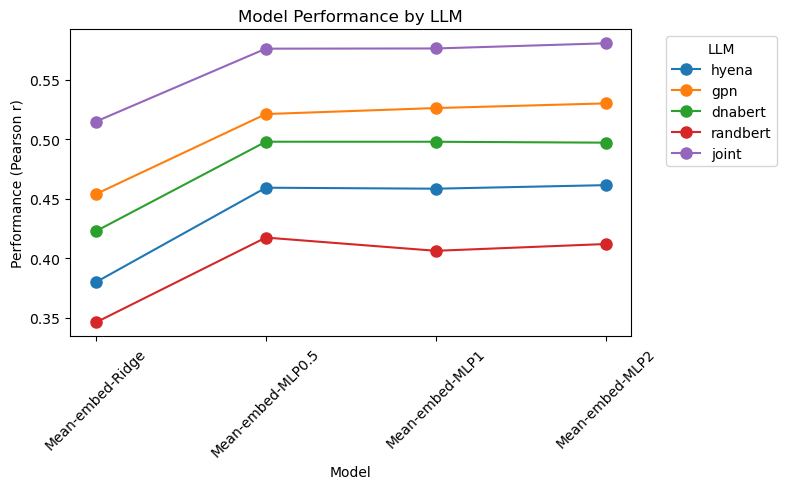

In [8]:
import numpy as np
df = other_results

# Filter out CLS-model entries
df_filtered = df[~df['Model'].str.startswith('CLS')].copy()

# Define the order of models on the x-axis
model_order = ['Mean-embed-Ridge', 'Mean-embed-MLP0.5', 
               'Mean-embed-MLP1', 'Mean-embed-MLP2']
x_positions = np.arange(len(model_order))

# Create the scatter plot
plt.figure(figsize=(8, 5))
for llm in df_filtered['LLM'].unique():
    df_llm = df_filtered[df_filtered['LLM'] == llm]
    xs = [model_order.index(m) for m in df_llm['Model']]
    ys = df_llm['Performance']
    plt.plot(xs, ys, label=llm, marker='o', linestyle='-', markersize=8)

plt.xticks(x_positions, model_order, rotation=45)
plt.xlabel('Model')
plt.ylabel('Performance (Pearson r)')
plt.title('Model Performance by LLM')
plt.legend(title='LLM', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# now we can compare it to the models with the CNN

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
other_results = pd.read_csv('/data1/lesliec/sarthak/data/joint_playground/koo_benchmark/LLM_CNN.csv')
other_results

,LLM,Model,Performance,Cell Type
0,sei,CNN,0.734926,HepG2
1,sei,CNN,0.751267,K562
2,ResNet,CNN,0.752903,HepG2
3,rep_cnn,CNN,0.638292,HepG2
4,ResNet,CNN,0.789607,K562
5,rep_cnn,CNN,0.690583,K562
6,MPRAnn,CNN,0.712668,HepG2
7,MPRAnn,CNN,0.742255,K562
8,gpn,CNN0.5,0.609034,HepG2
9,gpn,CNN1.0,0.636665,HepG2


In [2]:
other_results = other_results[other_results['Cell Type'] == 'K562']
other_results

,LLM,Model,Performance,Cell Type
1,sei,CNN,0.751267,K562
4,ResNet,CNN,0.789607,K562
5,rep_cnn,CNN,0.690583,K562
7,MPRAnn,CNN,0.742255,K562
11,gpn,CNN0.5,0.679863,K562
12,gpn,CNN1.0,0.678043,K562
13,gpn,CNN2.0,0.685116,K562
17,dnabert,CNN0.5,0.572129,K562
18,dnabert,CNN1.0,0.567828,K562
19,dnabert,CNN2.0,0.566508,K562


In [5]:
#now remove models CNN0.5 and CNN 1.0
other_results = other_results[~other_results['Model'].str.contains('CNN0.5')]
other_results = other_results[~other_results['Model'].str.contains('CNN1.0')]
other_results

,LLM,Model,Performance,Cell Type
1,sei,CNN,0.751267,K562
4,ResNet,CNN,0.789607,K562
5,rep_cnn,CNN,0.690583,K562
7,MPRAnn,CNN,0.742255,K562
13,gpn,CNN2.0,0.685116,K562
19,dnabert,CNN2.0,0.566508,K562
25,hyena,CNN2.0,0.643448,K562
31,randbert,CNN2.0,0.444155,K562


In [6]:
#now let's add our own
out = 0.7484
new_row = pd.DataFrame({'Model': ['CNN2.0'], 'Cell Type': ['K562'], 'Performance': [out], 'LLM': ['joint']})
other_results = pd.concat([other_results, new_row], ignore_index=True)
other_results

,LLM,Model,Performance,Cell Type
0,sei,CNN,0.751267,K562
1,ResNet,CNN,0.789607,K562
2,rep_cnn,CNN,0.690583,K562
3,MPRAnn,CNN,0.742255,K562
4,gpn,CNN2.0,0.685116,K562
5,dnabert,CNN2.0,0.566508,K562
6,hyena,CNN2.0,0.643448,K562
7,randbert,CNN2.0,0.444155,K562
8,joint,CNN2.0,0.748400,K562


In [ ]:
other_results #4,6,5,7,0,2,1,3

,LLM,Model,Performance,Cell Type
0,sei,CNN,0.751267,K562
1,ResNet,CNN,0.789607,K562
2,rep_cnn,CNN,0.690583,K562
3,MPRAnn,CNN,0.742255,K562
4,gpn,CNN2.0,0.685116,K562
5,dnabert,CNN2.0,0.566508,K562
6,hyena,CNN2.0,0.643448,K562
7,randbert,CNN2.0,0.444155,K562
8,joint,CNN2.0,0.748400,K562


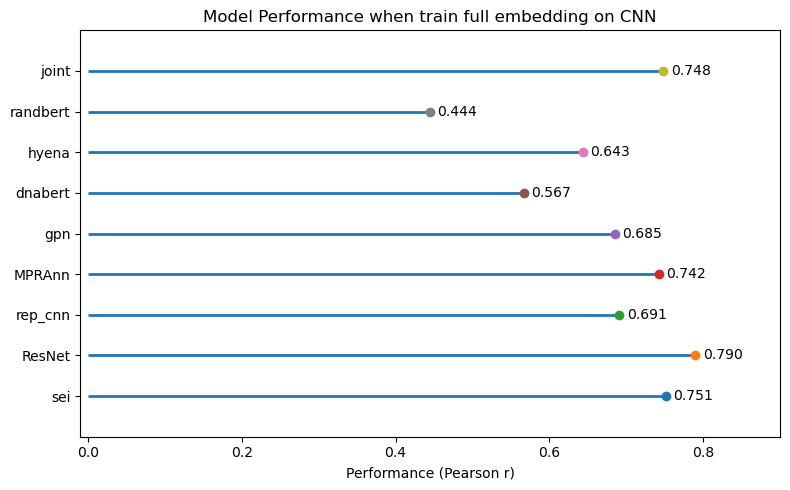

In [21]:
df = other_results
# Plot
fig, ax = plt.subplots(figsize=(8, 5))
y_pos = range(len(df))

for i, (llm, perf) in enumerate(zip(df['LLM'], df['Performance'])):
    # horizontal line
    ax.hlines(y=i, xmin=0, xmax=perf, linewidth=2)
    # marker
    ax.plot(perf, i, marker='o')
    # annotation
    ax.text(perf + 0.01, i, f"{perf:.3f}", va='center')

# Set y-axis labels
ax.set_yticks(y_pos)
ax.set_yticklabels(df['LLM'])
ax.set_xlabel('Performance (Pearson r)')
ax.set_ylim(-1, len(df))
ax.set_xlim(-0.01,0.9)
ax.set_title('Model Performance when train full embedding on CNN')
plt.tight_layout()
plt.show()

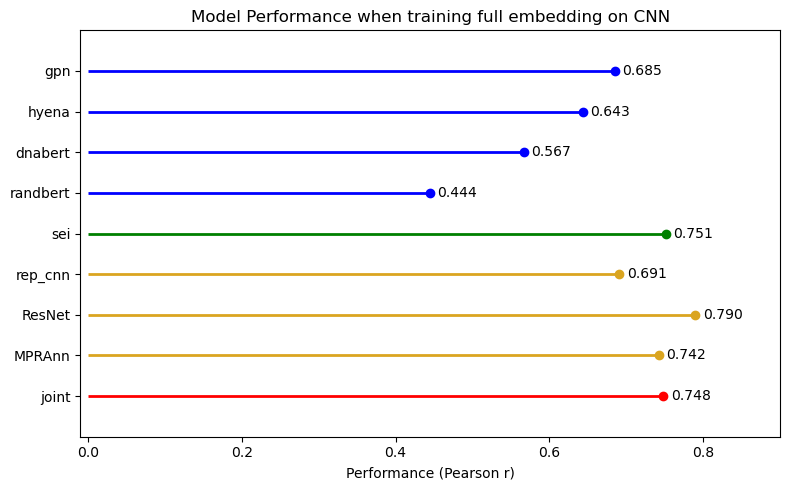

In [42]:
# Reorder your DataFrame according to the specified index order
order = [4,6,5,7,0,2,1,3,8][::-1]
df_ordered = other_results.loc[order].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8, 5))
n = len(df_ordered)

for i, (llm, perf) in enumerate(zip(df_ordered['LLM'], df_ordered['Performance'])):
    # determine color by “visual” position: top-down
    if i >= n - 4:
        color = 'blue'         # top 4
    elif i == n - 5:
        color = 'green'        # next 1
    elif i >= n - 8:
        color = 'goldenrod'    # next 3 (darker yellow)
    else:
        color = 'red'          # final 1

    ax.hlines(y=i, xmin=0, xmax=perf, linewidth=2, color=color)
    ax.plot(perf, i, 'o', color=color)
    ax.text(perf + 0.01, i, f"{perf:.3f}", va='center')

ax.set_yticks(range(n))
ax.set_yticklabels(df_ordered['LLM'])
ax.set_xlabel('Performance (Pearson r)')
ax.set_xlim(-0.01, 0.9)
ax.set_ylim(-1, n)
ax.set_title('Model Performance when training full embedding on CNN')
plt.tight_layout()
plt.show()



In [43]:
#let's add a row of NT
out = 0.5513
new_row = pd.DataFrame({'Model': ['CNN2.0'], 'Cell Type': ['K562'], 'Performance': [out], 'LLM': ['NT']})
other_results = pd.concat([other_results, new_row], ignore_index=True)
other_results

,LLM,Model,Performance,Cell Type
0,sei,CNN,0.751267,K562
1,ResNet,CNN,0.789607,K562
2,rep_cnn,CNN,0.690583,K562
3,MPRAnn,CNN,0.742255,K562
4,gpn,CNN2.0,0.685116,K562
5,dnabert,CNN2.0,0.566508,K562
6,hyena,CNN2.0,0.643448,K562
7,randbert,CNN2.0,0.444155,K562
8,joint,CNN2.0,0.748400,K562
9,NT,CNN2.0,0.551300,K562


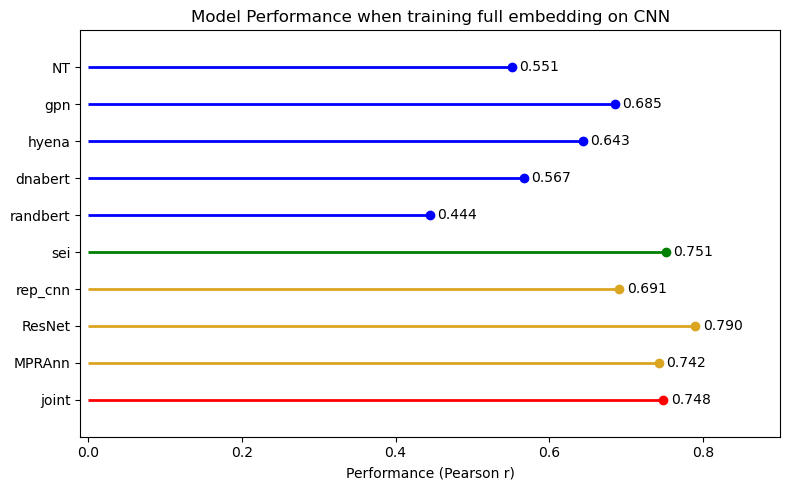

In [45]:
order = [9,4,6,5,7,0,2,1,3,8][::-1]
df_ordered = other_results.loc[order].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(8, 5))
n = len(df_ordered)

for i, (llm, perf) in enumerate(zip(df_ordered['LLM'], df_ordered['Performance'])):
    # determine color by “visual” position: top-down
    if i >= n - 5:
        color = 'blue'         # top 4
    elif i == n - 6:
        color = 'green'        # next 1
    elif i >= n - 9:
        color = 'goldenrod'    # next 3 (darker yellow)
    else:
        color = 'red'          # final 1

    ax.hlines(y=i, xmin=0, xmax=perf, linewidth=2, color=color)
    ax.plot(perf, i, 'o', color=color)
    ax.text(perf + 0.01, i, f"{perf:.3f}", va='center')

ax.set_yticks(range(n))
ax.set_yticklabels(df_ordered['LLM'])
ax.set_xlabel('Performance (Pearson r)')
ax.set_xlim(-0.01, 0.9)
ax.set_ylim(-1, n)
ax.set_title('Model Performance when training full embedding on CNN')
plt.tight_layout()
plt.show()